## Chapter 10

1557568250.0

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


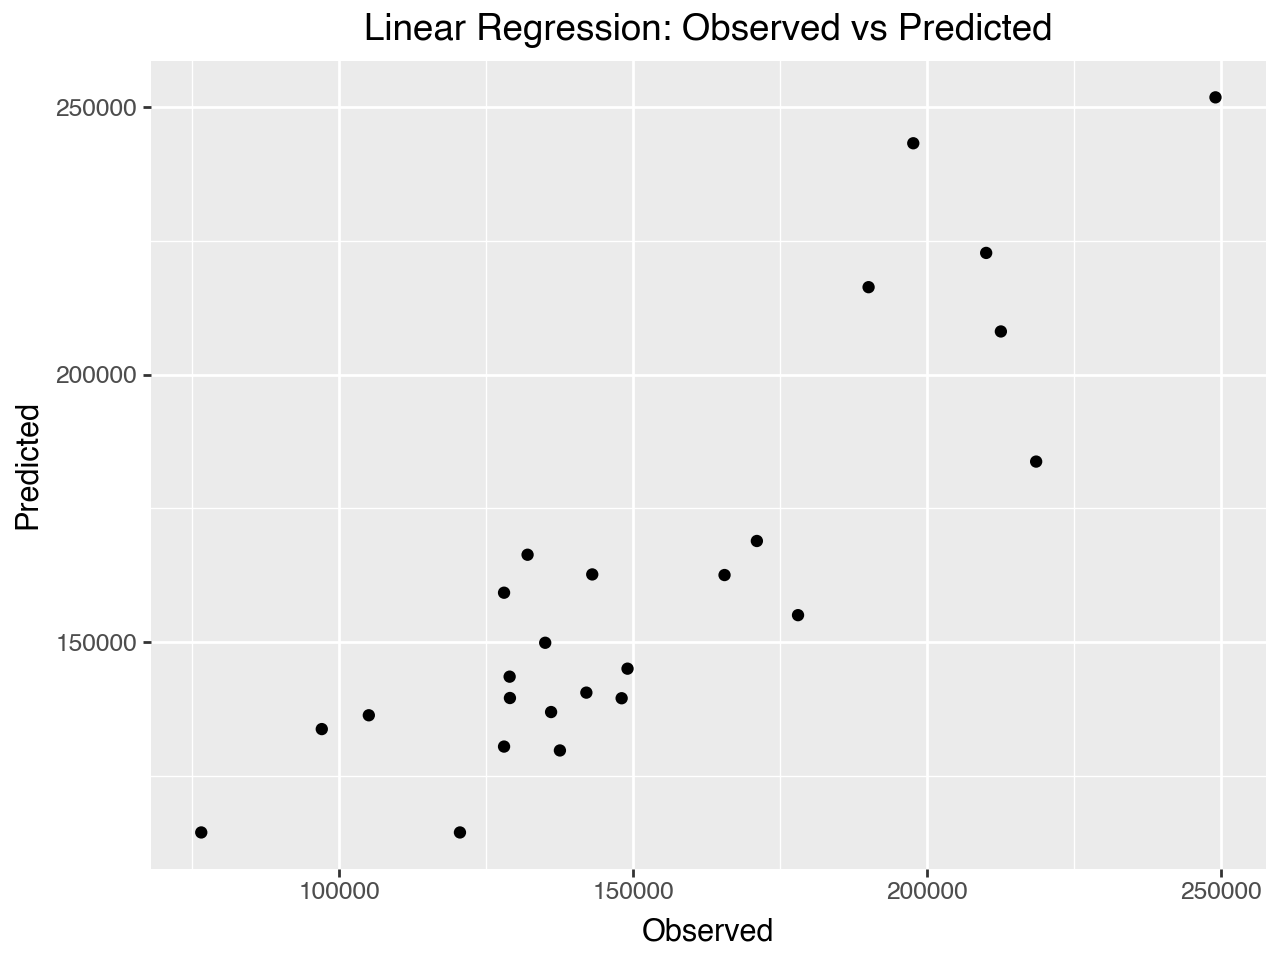

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


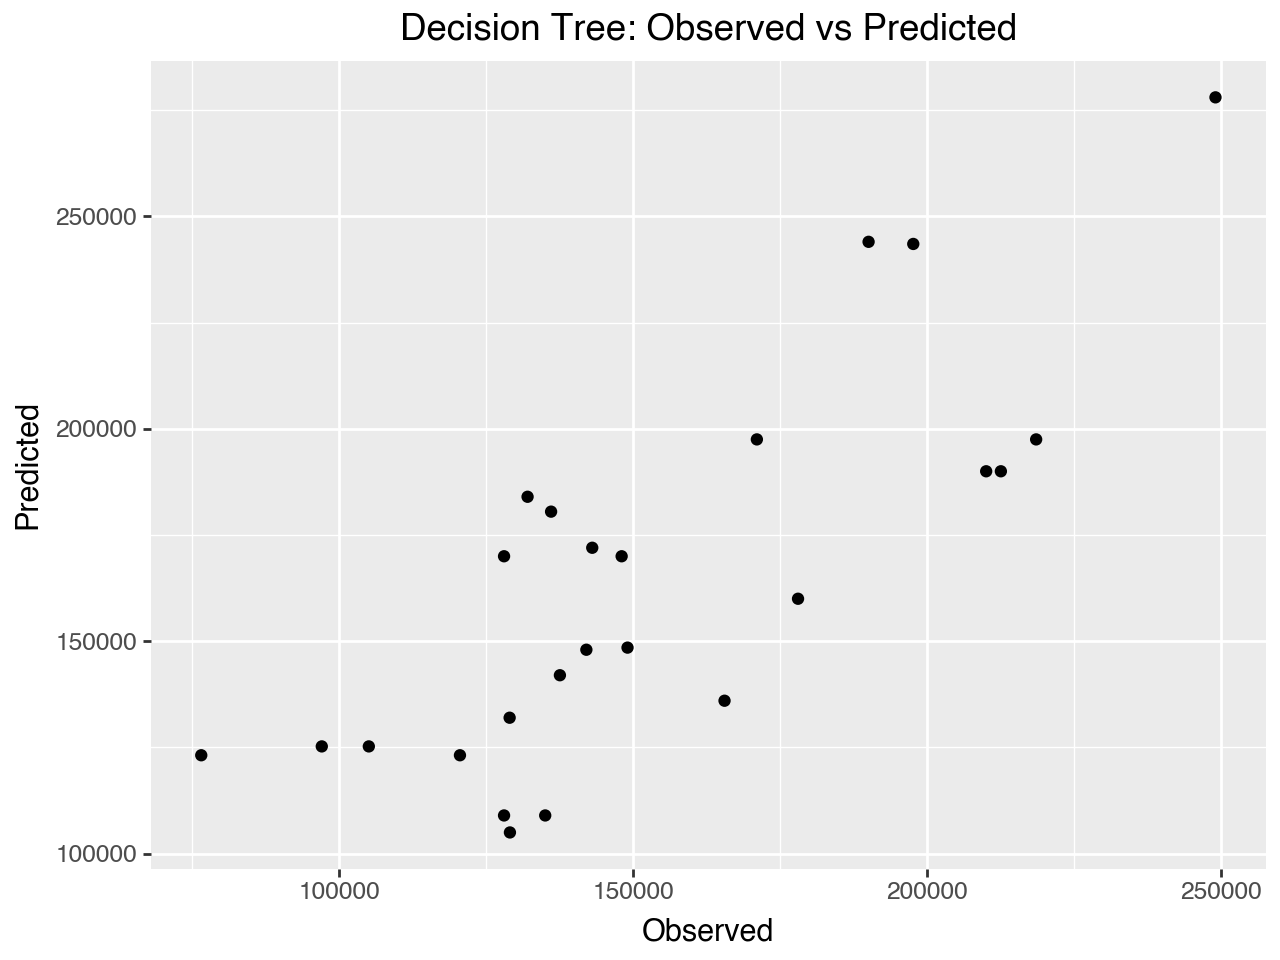

In [17]:
import pandas as pd
from plotnine import *
dat = pd.read_csv("https://www.dropbox.com/scl/fi/yf8t1x0uvrln93dzi6xd8/housing_small.csv?rlkey=uen32y937kqarrjra0v6jaez4&dl=1")
#response and predictors
y = dat['SalePrice']
X = dat[['Gr Liv Area', 'Bedroom AbvGr', 'Neighborhood_NAmes', 'Neighborhood_NWAmes']]
#necessary packages and functions
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()
#test/training split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#model creation
lr_fit = lr.fit(X_train, y_train)
dt_fit = dt.fit(X_train, y_train)
knn_fit = knn.fit(X_train, y_train)
#predictions
y_pred_knn = knn_fit.predict(X_test)
y_pred_lr = lr_fit.predict(X_test)
y_pred_dt = dt_fit.predict(X_test)
#create data sets to have the observed and predicted
df = pd.DataFrame({
    'Observed': y_test,
    'Predicted_KNN': y_pred_knn,
    'Predicted_LR': y_pred_lr,
    'Predicted_DT': y_pred_dt
})
#plots (should look like a line with a slope of 1 45º line)
(ggplot(df, aes(x='Observed', y='Predicted_KNN')) 
    + geom_point()
    + labs(title="KNN"))

(ggplot(df, aes(x='Observed', y='Predicted_LR')) 
    + geom_point()
    + labs(title="Linear Regression"))

(ggplot(df, aes(x='Observed', y='Predicted_DT')) 
    + geom_point()
    + labs(title="Decision Tree"))

#linear regression looks the best based on the plots

#MSE calculation
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_knn)
mean_squared_error(y_test, y_pred_lr)
mean_squared_error(y_test, y_pred_dt)
